In [40]:
import sys
!{sys.executable} -m pip install PyPortfolioOpt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
stock_table = pd.read_csv("../genetic_algorithm/processed_data/cleaned_data.csv")
stock_table.head()

,Date,AAPL,ADBE,AMD,AMZN,BRK,CVX,DIS,GOOGL,INTC,...,KO,MA,META,MSFT,NFLX,NVDA,PG,TSLA,V,XOM
0,2021-12-01,164.77,657.41,149.11,3443.72,275.00,112.10,142.15,2821.03,48.60,...,52.30,306.28,310.60,330.08,617.77,314.35,146.40,1095.00,190.16,59.79
1,2021-12-02,163.76,671.88,150.68,3437.36,279.09,115.14,147.20,2859.32,49.50,...,53.07,320.20,310.39,329.49,616.47,321.26,147.26,1084.60,198.29,61.28
2,2021-12-03,161.84,616.53,144.01,3389.79,277.43,114.41,146.22,2840.03,49.25,...,53.54,322.11,306.84,323.01,602.13,306.93,149.88,1014.97,196.32,60.89
3,2021-12-06,165.32,622.04,139.06,3427.37,281.38,116.20,150.37,2863.10,50.99,...,54.91,333.33,317.87,326.19,612.69,300.37,152.15,1009.01,202.68,61.58
4,2021-12-07,171.18,649.96,144.85,3523.29,284.97,117.92,150.81,2945.39,52.57,...,55.21,339.51,322.81,334.92,625.58,324.27,151.75,1051.75,207.37,62.27


In [43]:
stock_table = stock_table.set_index("Date")
stock_table = stock_table.apply(pd.to_numeric, errors="coerce")

In [44]:
returns = expected_returns.mean_historical_return(stock_table, frequency=1) 
covariance = risk_models.sample_cov(stock_table)

In [45]:
returns

AAPL     0.000472
ADBE    -0.000328
AMD     -0.000120
AMZN    -0.003740
BRK      0.000749
CVX      0.000491
DIS     -0.000252
GOOGL   -0.003734
INTC    -0.000957
JNJ     -0.000023
KO       0.000277
MA       0.000735
META     0.000806
MSFT     0.000330
NFLX     0.000467
NVDA    -0.001120
PG       0.000270
TSLA    -0.001582
V        0.000670
XOM      0.000901
dtype: float64

In [46]:
covariance.head()

,AAPL,ADBE,AMD,AMZN,BRK,CVX,DIS,GOOGL,INTC,JNJ,KO,MA,META,MSFT,NFLX,NVDA,PG,TSLA,V,XOM
AAPL,0.075286,0.058501,0.079753,0.057619,0.023899,0.014466,0.036709,0.062460,0.051265,0.008130,0.014954,0.037611,0.067483,0.052498,0.060161,0.092599,0.013701,0.082757,0.033589,0.013547
ADBE,0.058501,0.148396,0.107339,0.082904,0.024585,0.014653,0.044803,0.074010,0.064414,0.004389,0.013167,0.045727,0.091216,0.070344,0.081371,0.123565,0.012158,0.089560,0.042204,0.011340
AMD,0.079753,0.107339,0.280671,0.113658,0.033184,0.019712,0.060866,0.094035,0.115394,-0.001631,0.008962,0.059089,0.126734,0.087945,0.113184,0.235338,0.008730,0.138567,0.050354,0.014629
AMZN,0.057619,0.082904,0.113658,0.448317,0.026610,0.019088,0.057424,0.073449,0.069904,0.004915,0.012274,0.041984,0.105829,0.074351,0.097875,0.114888,0.010081,0.094038,0.037817,0.012499
BRK,0.023899,0.024585,0.033184,0.026610,0.030493,0.019030,0.024648,0.027922,0.027341,0.011966,0.013374,0.024543,0.028632,0.021711,0.025604,0.034508,0.011252,0.027441,0.022485,0.018613


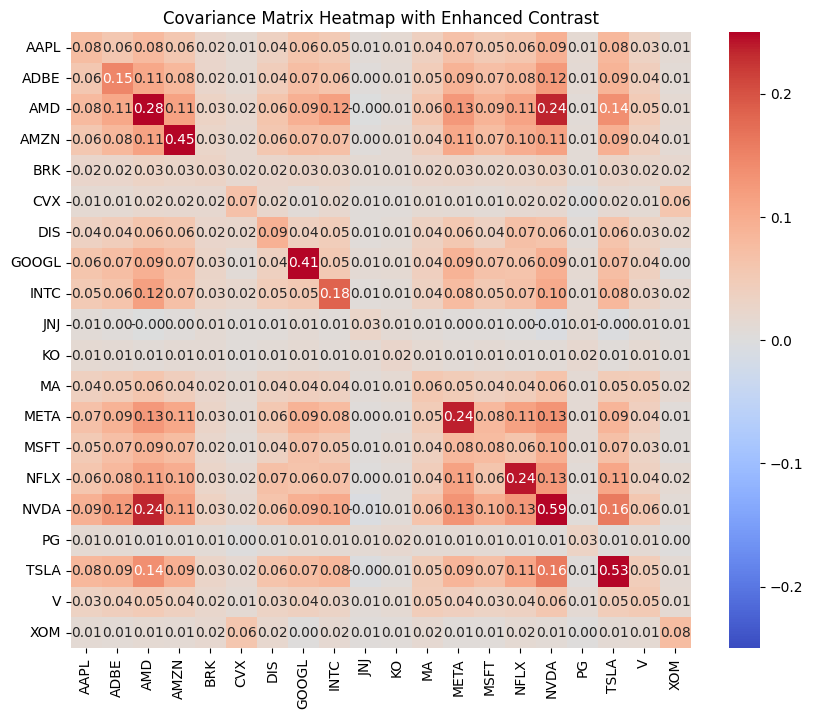

In [47]:
plt.figure(figsize=(10, 8))  
sns.heatmap(
    covariance, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  
    vmin=-0.25, 
    vmax=0.25,  
    center=0 
)

plt.title("Covariance Matrix Heatmap with Enhanced Contrast")
plt.show()

In [48]:
ef = EfficientFrontier(returns, covariance)
risk_free_rate_daily = 0.0001
weights = ef.max_sharpe(risk_free_rate_daily) 
clean_weights = ef.clean_weights()



In [49]:
# Convert the weights dictionary to a DataFrame
weights_df = pd.DataFrame(list(clean_weights.items()), columns=["Asset", "Weight"])

# Save the DataFrame as a CSV file
weights_df.to_csv("markowitz_output.csv", index=False)

print("Portfolio weights saved to portfolio_weights.csv")

Portfolio weights saved to portfolio_weights.csv


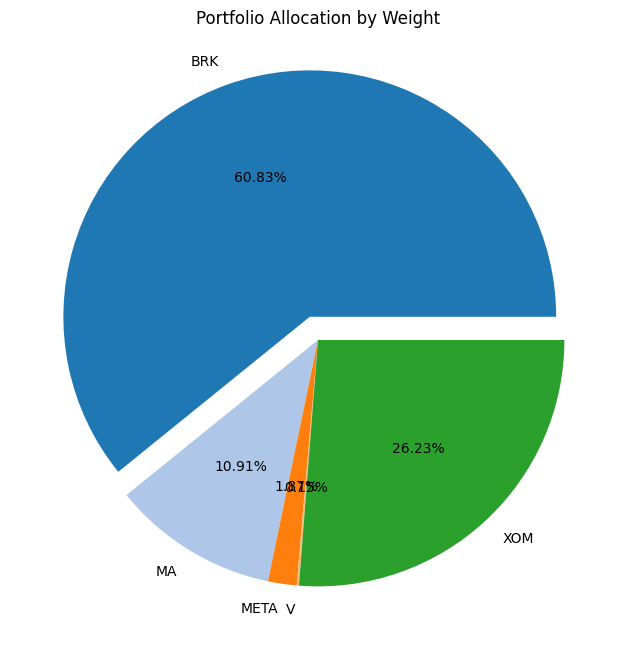

In [50]:
labels = list(clean_weights.keys())
sizes = list(clean_weights.values())

filtered_labels = [label for label, size in zip(labels, sizes) if size > 0]
filtered_sizes = [size for size in sizes if size > 0]

plt.figure(figsize=(8, 8))
plt.pie(
    filtered_sizes,
    labels=filtered_labels,
    autopct="%1.2f%%",  
    startangle=0,     
    explode=[0.1 if size == max(filtered_sizes) else 0 for size in filtered_sizes], 
    colors=plt.cm.tab20.colors  
)
plt.title("Portfolio Allocation by Weight")
plt.show()
